### Import Libraries

In [1]:
import pandas as pd
import scipy.fftpack
from scipy.fftpack import dct
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os

### File Paths

In [2]:
new_protocol_file = './multimodal-data/new_protocol_val.csv'

In [3]:
new_folder_file = '../Dataset/Mix/Validation/Voice'

In [4]:
df_protocol = pd.read_csv(new_protocol_file)

### File Check

In [5]:
print(df_protocol.head())

         file_id     type  speaker_id phrase_id environment_id playback_id  \
0  D_1000022.wav  genuine           1       S02              -           -   
1  D_1000033.wav  genuine           1       S03              -           -   
2  D_1000062.wav  genuine           1       S03              -           -   
3  D_1000115.wav  genuine           1       S09              -           -   
4  D_1001555.wav    spoof           1       S08            E05         P01   

  recording_id  
0            -  
1            -  
2            -  
3            -  
4          R01  


In [6]:
voice_labels = df_protocol['type'].map({'genuine' : 1, 'spoof' : 0})

In [7]:
voice_identity = df_protocol['speaker_id']

In [8]:
print(voice_labels)

0     1
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    1
25    1
26    1
27    1
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    1
37    1
38    1
39    1
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
Name: type, dtype: int64


In [9]:
print(voice_labels.shape)

(48,)


### Check video durations

In [10]:
folder_train_file = '../Dataset/ASVSpoof/actual/ASVspoof2017_V2_train'

In [11]:
# Function to get duration of each audio file
def get_audio_durations(folder):
    durations = []
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        audio, sr = librosa.load(file_path, sr=None)  # Load audio with its original sampling rate
        duration = librosa.get_duration(y=audio, sr=sr)  # Get the duration of the audio file
        durations.append(duration)
    return durations

In [12]:
# Get durations for train set
train_durations = get_audio_durations(folder_train_file)

In [13]:
print(train_durations)

[2.4215, 1.7495, 1.5135, 1.7495, 1.6895, 1.8295, 1.0215, 1.5335, 1.5735, 1.4575, 2.9295, 2.4175, 2.7775, 2.2455, 1.3335, 2.4055, 1.8655, 2.9495, 3.0295, 4.2135, 3.2655, 2.1055, 3.5615, 2.8735, 3.2855, 2.3215, 2.5375, 3.4615, 3.6415, 3.2655, 2.7575, 2.4415, 1.5735, 2.9095, 2.9735, 2.7335, 2.7735, 2.1415, 2.7935, 3.0495, 2.9415, 2.8775, 3.7615, 1.7295, 2.9695, 3.3055, 2.1655, 2.9495, 2.9935, 3.2855, 3.1095, 2.1855, 3.8695, 3.4855, 3.3895, 4.2535, 3.7095, 3.1655, 3.3895, 4.2215, 4.1575, 2.3975, 2.9495, 3.1895, 2.9895, 3.1295, 2.7535, 3.4055, 2.4775, 1.3535, 2.0095, 2.9695, 2.5975, 2.7975, 2.5375, 2.6775, 2.8175, 2.1175, 1.4935, 2.2055, 2.2455, 3.3415, 2.8775, 3.0695, 1.9815, 2.8135, 2.6855, 2.6215, 1.5335, 2.5575, 2.5575, 2.0455, 2.8775, 2.9415, 1.5335, 2.6855, 2.1735, 2.6775, 2.2015, 2.6975, 1.6695, 2.6975, 3.1855, 3.0295, 2.6375, 2.1615, 2.7535, 2.5975, 1.9095, 1.8495, 2.3415, 1.7895, 2.1655, 1.2775, 1.9495, 1.8095, 2.7535, 2.9415, 2.9415, 2.2455, 2.3415, 1.4335, 3.1295, 2.1815, 2.0255,

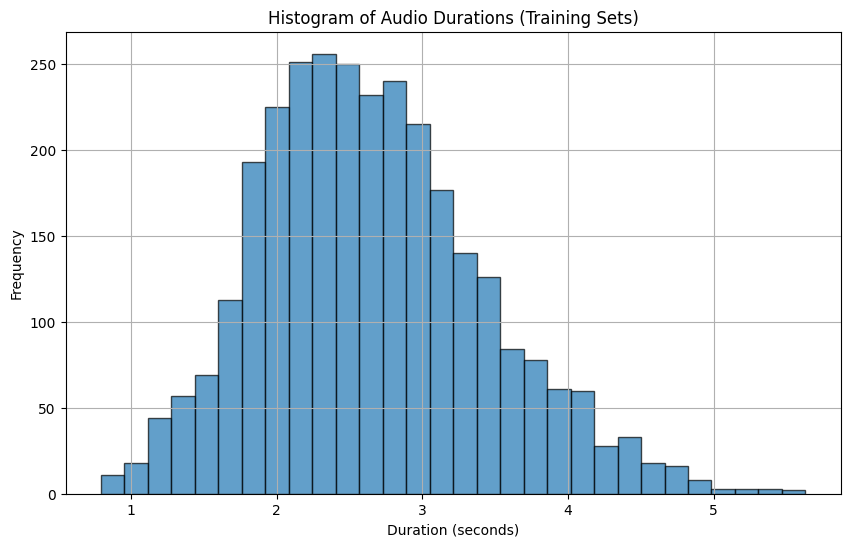

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(train_durations, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Audio Durations (Training Sets)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
import numpy as np

In [16]:
# Calculate the median duration from all durations
median_duration = np.median(train_durations)

# Print the median value
print(f"The median audio duration is: {median_duration:.2f} seconds")

The median audio duration is: 2.59 seconds


### Get Audios

In [17]:
def get_audios(folder):
    audios = []
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        audio, _ = librosa.load(file_path, sr=None)  # Load audio with its original sampling rate
        audios.append(audio)
    return audios

In [18]:
new_audios = get_audios(new_folder_file)

In [19]:
# Get audio data samples
print(len(new_audios))

48


### Voice Activity Detection

In [20]:
# import webrtcvad

In [21]:
# def apply_vad(audio, sample_rate):
#     # Convert audio to 16-bit PCM
#     audio = (audio * 32767).astype(np.int16)
    
#     vad = webrtcvad.Vad(2)  # Set aggressiveness mode (0-3)
#     frame_duration = 30  # Duration of each frame in ms
#     frame_size = sample_rate * frame_duration // 1000  # Convert ms to sample size
#     frames = [audio[i:i + frame_size] for i in range(0, len(audio), frame_size) if len(audio[i:i + frame_size]) == frame_size]
    
#     voiced_frames = [frame for frame in frames if vad.is_speech(frame.tobytes(), sample_rate)]
    
#     # Concatenate voiced frames back into a single audio array
#     voiced_audio = np.concatenate(voiced_frames)
    
#     return voiced_audio

# def cycle_through_files(folder):
#     voice_list, durations = [], []
#     for file in os.listdir(folder):
#         file_path = os.path.join(folder, file)
#         audio, sr = librosa.load(file_path, sr=None)  # Load audio with its original sampling rate
#         duration = librosa.get_duration(y=audio, sr=sr)  # Get the duration of the audio file
#         durations.append(duration)
        
#         voice = apply_vad(audio, sr)
#         voice_list.append(voice)

#     return voice_list, durations

In [22]:
# train_audio_vad, train_vad_durations = cycle_through_files(folder_train_file)
# eval_audio_vad, eval_vad_durations = cycle_through_files(folder_eval_file)
# dev_audio_vad, dev_vad_durations = cycle_through_files(folder_dev_file)

In [23]:
# plt.figure(figsize=(10, 6))
# plt.hist(train_vad_durations, bins=30, edgecolor='black', alpha=0.7)
# plt.title('Histogram of Audio Durations (Training Sets)')
# plt.xlabel('Duration (seconds)')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

In [24]:
# # Create a histogram with overlapping bars
# plt.figure(figsize=(10, 6))
# plt.hist(train_durations, bins=30, color='blue', alpha=0.5, label='Dataset 1', edgecolor='black')
# plt.hist(train_vad_durations, bins=30, color='red', alpha=0.5, label='Dataset 2', edgecolor='black')

# # Adding titles and labels
# plt.title('Duration Histograms')
# plt.xlabel('Duration (seconds)')
# plt.ylabel('Frequency')
# plt.legend()  # Show legend to distinguish between datasets
# plt.grid(True)

# # Show the plot
# plt.show()

In [25]:
# # Create a histogram with overlapping bars
# plt.figure(figsize=(10, 6))
# plt.hist(eval_durations, bins=30, color='blue', alpha=0.5, label='Dataset 1', edgecolor='black')
# plt.hist(eval_vad_durations, bins=30, color='red', alpha=0.5, label='Dataset 2', edgecolor='black')

# # Adding titles and labels
# plt.title('Duration Histograms')
# plt.xlabel('Duration (seconds)')
# plt.ylabel('Frequency')
# plt.legend()  # Show legend to distinguish between datasets
# plt.grid(True)

# # Show the plot
# plt.show()

In [26]:
# # Create a histogram with overlapping bars
# plt.figure(figsize=(10, 6))
# plt.hist(dev_durations, bins=30, color='blue', alpha=0.5, label='Dataset 1', edgecolor='black')
# plt.hist(dev_vad_durations, bins=30, color='red', alpha=0.5, label='Dataset 2', edgecolor='black')

# # Adding titles and labels
# plt.title('Duration Histograms')
# plt.xlabel('Duration (seconds)')
# plt.ylabel('Frequency')
# plt.legend()  # Show legend to distinguish between datasets
# plt.grid(True)

# # Show the plot
# plt.show()

Video Activity Detection (webrtcvad) has no impact on the durations of ASVSpoof2017 dataset

### Normalize Audio

In [27]:
def normalize_audio(audio):
    return audio / np.max(np.abs(audio))

def cycle_normalize_file(audios):
    normalized_audios = []
    for audio in audios:
        normalized_audio = normalize_audio(audio)
        normalized_audios.append(normalized_audio)

    return normalized_audios

In [28]:
new_audios = cycle_normalize_file(new_audios)

### Noise Removal

In [29]:
import noisereduce as nr

c:\Users\andre\anaconda3\envs\python-cpu\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
def reduce_noise(audio, sr):
    return nr.reduce_noise(y=audio, sr=sr)

def cycle_reduce_noise_file(audios):
    noise_reduced_audios = []
    for audio in audios:        
        noise_reduced_audio = reduce_noise(audio, 16000)
        noise_reduced_audios.append(noise_reduced_audio)

    return noise_reduced_audios

In [31]:
new_audios = cycle_reduce_noise_file(new_audios)

### Pre-Emphasis

In [32]:
def pre_emphasize(audio):
    alpha = 0.97
    pre_emphasized_audio = np.append(audio[0], audio[1:] - alpha * audio[:-1])
    return pre_emphasized_audio

def cycle_pre_emphasize_audio(audios):
    pre_emphasized_audios = []
    for audio in audios:
        pre_emphasized_audio = pre_emphasize(audio)
        pre_emphasized_audios.append(pre_emphasized_audio)

    return pre_emphasized_audios

In [33]:
new_audios = cycle_pre_emphasize_audio(new_audios)

### Pad & Truncate Audio Files

In [34]:
def pad_and_truncate_audio(audio, target_duration, sample_rate):
    target_length = int(target_duration * sample_rate)
    
    if len(audio) < target_length:
        # Pad the audio with zeros
        pad_width = target_length - len(audio)
        return np.pad(audio, (0, pad_width), mode='constant')
    elif len(audio) > target_length:
        # Truncate the audio
        return audio[:target_length]
    return audio  # If already the correct length, return as is

def pad_and_truncate_files(audios):
    new_audio = []
    for audio in audios:
        processed_audio = pad_and_truncate_audio(audio, median_duration, 16000)
        new_audio.append(processed_audio)

    return new_audio

In [35]:
new_audios = pad_and_truncate_files(new_audios)

In [36]:
new_audio_save_path = '../Dataset/Mix/Validation/audio.npy'
new_label_save_path = '../Dataset/Mix/Validation/audio_labels.npy'

In [37]:
new_identity_save_path = '../Dataset/Mix/Validation/audio_identity.npy'

In [38]:
np.save(new_audio_save_path, new_audios)
np.save(new_label_save_path, voice_labels)

In [39]:
np.save(new_identity_save_path, voice_identity)

In [40]:
new_audios = np.load(new_audio_save_path)
new_labels = np.load(new_label_save_path)

In [41]:
print(new_audios.shape)

(48, 41440)


### Framing

In [42]:
def frame(audio, frame_size, hop_length):
    audio = np.asarray(audio).flatten()  # Ensure audio is 1D
    return librosa.util.frame(audio, frame_length=frame_size, hop_length=hop_length)

def cycle_frame_audio(audios):
    framed_audios = []
    for audio in audios:
        framed_audio = frame(audio, 400, 160)
        framed_audios.append(framed_audio)

    return framed_audios

### Windowing

In [43]:
def window(frames):
    window = np.hamming(frames.shape[0])
    return window

### LFCC

In [44]:
def compute_lfcc(audio, sr, num_coeffs=13):
    # Step 1: Framing
    framed_audio = frame(audio, 400, 160)

    # Step 2: Apply windowing to each frame
    hamming_window = np.hamming(framed_audio.shape[1])
    windowed_frames = framed_audio * hamming_window

    # Step 3: Fourier Transform and Power Spectrum
    spectrum = np.abs(scipy.fftpack.fft(windowed_frames, n=512))**2

    # Retain only the positive frequencies
    spectrum = spectrum[:, :spectrum.shape[1] // 2 + 1]  # (num_frames, 257)

    # Step 4: Filterbank energies
    num_filters = 40  # Typically, we use 40 filters for MFCC/LFCC
    filter_banks = librosa.filters.mel(sr=sr, n_fft=512, n_mels=num_filters)
    filter_banks_energies = np.dot(filter_banks, spectrum.T)  # Transpose spectrum for dot product

    # Step 5: Logarithm of filterbank energies
    log_filter_banks = np.log(filter_banks_energies + 1e-10)  # Add small value to avoid log(0)

    # Step 6: DCT (Discrete Cosine Transform)
    lfcc = dct(log_filter_banks, type=2, axis=1, norm='ortho')[:, :num_coeffs]

    return lfcc

In [45]:
def compute_lfcc_for_audios(audios, sr=16000):
    all_lfccs = []
    for audio in audios:
        lfcc = compute_lfcc(audio, sr)
        all_lfccs.append(lfcc)
    return all_lfccs

In [46]:
# train_lfcc = compute_lfcc_for_audios(train_audios)
# eval_lfcc = compute_lfcc_for_audios(eval_audios)
# dev_lfcc = compute_lfcc_for_audios(dev_audios)

In [47]:
new_lfcc = compute_lfcc_for_audios(new_audios)

In [48]:
# train_lfcc_array = np.array(train_lfcc)
# eval_lfcc_array = np.array(eval_lfcc)
# dev_lfcc_array = np.array(dev_lfcc)

# print("Train LFCC shape:", train_lfcc_array.shape)
# print("Eval LFCC shape:", eval_lfcc_array.shape)
# print("Dev LFCC shape:", dev_lfcc_array.shape)

In [49]:
new_lfcc_array = np.array(new_lfcc)

In [50]:
new_lfcc_path = '../Dataset/Mix/Validation/new_lfcc.npy'

In [51]:
np.save(new_lfcc_path, new_lfcc_array)

In [52]:
train_lfcc_array = np.load(new_lfcc_path)

In [53]:
print("Train LFCC shape:", train_lfcc_array.shape)

Train LFCC shape: (48, 40, 13)


In [ ]:
train_lfcc = train_lfcc_array.reshape(train_lfcc_array.shape[0], -1)

In [ ]:
print("Train LFCC shape:", train_lfcc.shape)
print("Eval LFCC shape:", eval_lfcc.shape)
print("Dev LFCC shape:", dev_lfcc.shape)